In [2]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas
dataframe = pandas.read_excel('transfusion.xlsx')
dataframe

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [2]:
dataframe.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
import pandas as pd
df = pd.read_excel('transfusion.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [1]:
import pandas as pd
df = pd.read_excel('transfusion.xlsx')
df.rename(
    columns={'whether he/she donated blood in March 2007':'Target'},
    inplace=True
)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
import pandas as pd
df = pd.read_excel('transfusion.xlsx')
df.rename(
    columns={'whether he/she donated blood in March 2007':'Target'},
    inplace=True
)
df.head()
Target_incidence=df.Target.value_counts(normalize=True).round(3)
print(Target_incidence)
print(df.head())

Target
0    0.762
1    0.238
Name: proportion, dtype: float64
   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   Target  
0       1  
1       1  
2       1  
3       1  
4       0  


In [4]:
import pandas as pd
df = pd.read_excel('transfusion.xlsx')
df.rename(
    columns={'whether he/she donated blood in March 2007':'Target'},
    inplace=True
)
df.head()
from sklearn.model_selection import train_test_split
x=df.drop(columns='Target')
y=df['Target']
x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size=0.25,
    random_state=42,
    stratify=y
    )
print(x_train.head(2))

     Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
334                16                  2                    500             16
99                  5                  7                   1750             26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   Target                 748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


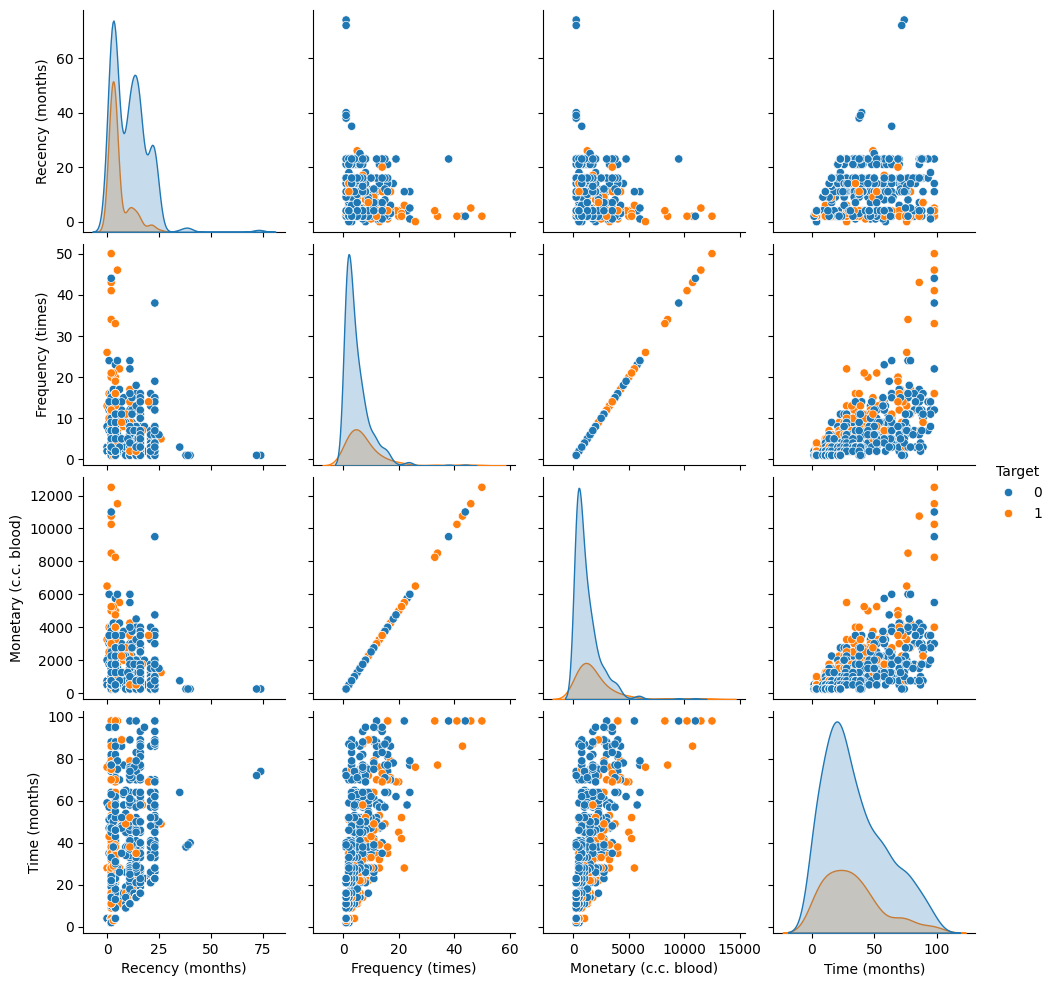

In [4]:
import pandas as pd
import seaborn as sns
df = pd.read_excel('transfusion.xlsx')
df.rename(
    columns={'whether he/she donated blood in March 2007':'Target'},
    inplace=True
)
df.info()
df.describe()
df['Target'].value_counts()
sns.pairplot(df, hue='Target')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

df = pd.read_excel('transfusion.xlsx')
df.rename(
    columns={'whether he/she donated blood in March 2007':'Target'},
    inplace=True
)
X = df.drop('Target', axis=1)
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       113
           1       0.57      0.11      0.18        37

    accuracy                           0.76       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.72      0.76      0.69       150



In [9]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       113
           1       0.39      0.24      0.30        37

    accuracy                           0.72       150
   macro avg       0.59      0.56      0.56       150
weighted avg       0.68      0.72      0.70       150



ROC-AUC Score: 0.6643147572351111


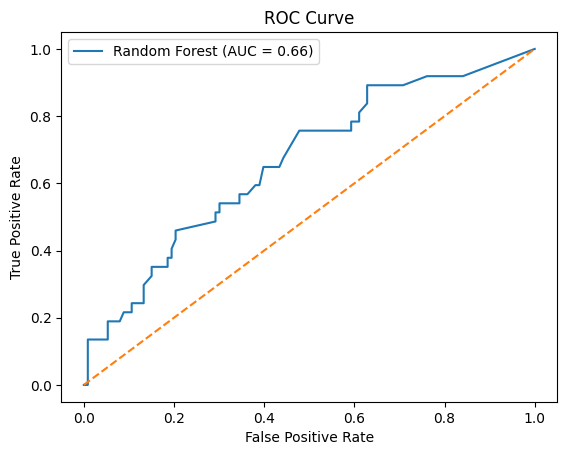

In [10]:
# ROC-AUC Score
y_probs = rf_model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [11]:
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, None]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'max_depth': 10, 'n_estimators': 50}
